Лабораторная работа №4

## Случайный лес (Random Forest)

## 2. Создание бейзлайна и оценка качества

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, 
    classification_report, precision_recall_curve, auc
)
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [2]:
# Загрузка данных
df_water = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)
df_concrete = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

print(f"Размер данных (вода): {df_water.shape}")
print(f"Размер данных (бетон): {df_concrete.shape}")

Размер данных (вода): (3276, 10)
Размер данных (бетон): (1030, 9)


### 2a. Подготовка данных и обучение baseline моделей

In [3]:
# удаление пропусков для простого baseline
df_water_clean = df_water.dropna()
df_concrete_clean = df_concrete.dropna()

# разделение на признаки и целевую переменную
X_water = df_water_clean.drop('Potability', axis=1)
y_water = df_water_clean['Potability']

X_concrete = df_concrete_clean.iloc[:, :-1]
y_concrete = df_concrete_clean.iloc[:, -1]

# разделение на обучающую и тестовую выборки
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(
    X_water, y_water, test_size=0.3, random_state=42
)

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.3, random_state=42
)

print(f"Классификация - тренировочная: {X_train_water.shape}, тестовая: {X_test_water.shape}")
print(f"Регрессия - тренировочная: {X_train_concrete.shape}, тестовая: {X_test_concrete.shape}")

Классификация - тренировочная: (1407, 9), тестовая: (604, 9)
Регрессия - тренировочная: (721, 8), тестовая: (309, 8)


Обучим модели случайного леса без качественной предобработки данных. Удалим только пропуски, чтобы модель не выдавала ошибку.

In [4]:
# обучение случайного леса для классификации
rf_clf_baseline = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf_baseline.fit(X_train_water, y_train_water)
y_pred_water_baseline = rf_clf_baseline.predict(X_test_water)
y_pred_proba_water_baseline = rf_clf_baseline.predict_proba(X_test_water)[:, 1]

# обучение случайного леса для регрессии
rf_reg_baseline = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_baseline = rf_reg_baseline.predict(X_test_concrete)

### 2b. Оценка качества моделей

Выведем и проанализируем метрики для модели классификации.

Метрики качества (Случайный лес - baseline):
  Accuracy:  0.6705
  Precision: 0.6582
  Recall:    0.4177
  F1-score:  0.5111
  ROC-AUC:   0.6901
  PR-AUC:    0.6243

Матрица ошибок:


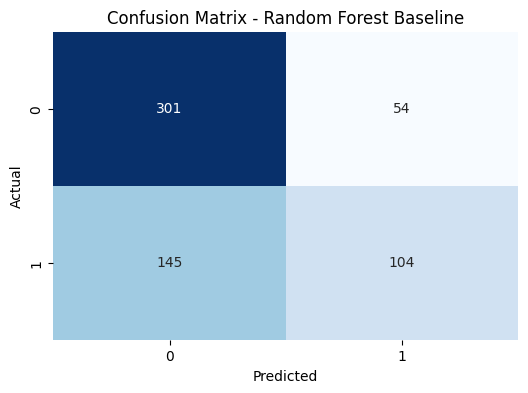


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       355
           1       0.66      0.42      0.51       249

    accuracy                           0.67       604
   macro avg       0.67      0.63      0.63       604
weighted avg       0.67      0.67      0.65       604



In [5]:
accuracy = accuracy_score(y_test_water, y_pred_water_baseline)
precision = precision_score(y_test_water, y_pred_water_baseline, zero_division=0)
recall = recall_score(y_test_water, y_pred_water_baseline, zero_division=0)
f1 = f1_score(y_test_water, y_pred_water_baseline, zero_division=0)
roc_auc = roc_auc_score(y_test_water, y_pred_proba_water_baseline)
pr_curve = precision_recall_curve(y_test_water, y_pred_proba_water_baseline)
pr_auc = auc(pr_curve[1], pr_curve[0])
cm = confusion_matrix(y_test_water, y_pred_water_baseline)

print(f"Метрики качества (Случайный лес - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

print(f"\nМатрица ошибок:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nОтчет о классификации:")
print(classification_report(y_test_water, y_pred_water_baseline))

*Метрики на сырых данных получислись не очень высокими, хотя они и лучше, чем у KNN или логистической регрессии. Кажется, что модель все еще пытается угадывать значения классов.*

#### Оценка качества модели регрессии

In [6]:
mse = mean_squared_error(y_test_concrete, y_pred_concrete_baseline)
mae = mean_absolute_error(y_test_concrete, y_pred_concrete_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_concrete, y_pred_concrete_baseline)

print(f"Метрики качества (Случайный лес - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")

Метрики качества (Случайный лес - baseline):
  MSE:  29.8643
  MAE:  3.7512
  RMSE: 5.4648
  R²:   0.8896


*Метрики регрессии показывают хорошие результаты. Случайный лес на сырых данных показал достаточно высокие значения R² и низкую ошибку.*

#### Визуализация результатов baseline подхода

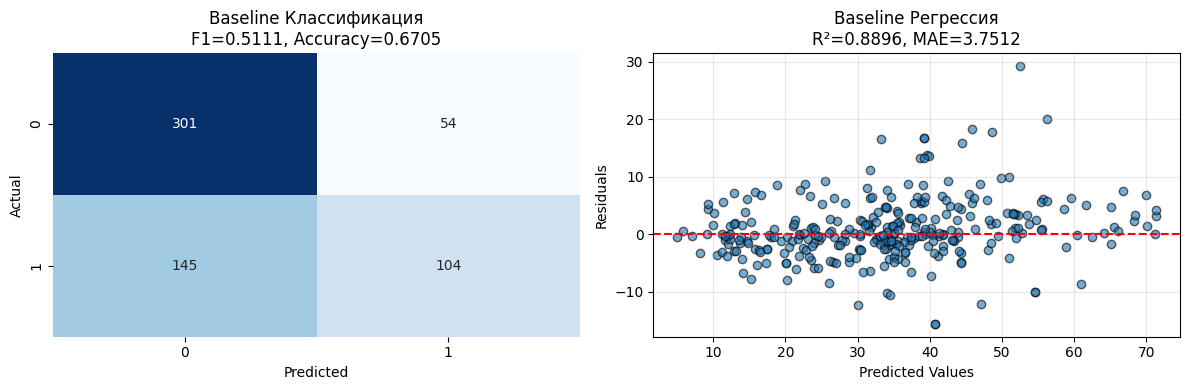

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_baseline_clf = confusion_matrix(y_test_water, y_pred_water_baseline)
sns.heatmap(cm_baseline_clf, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Baseline Классификация\nF1={f1:.4f}, Accuracy={accuracy:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_baseline_reg = y_test_concrete - y_pred_concrete_baseline
axes[1].scatter(y_pred_concrete_baseline, residuals_baseline_reg, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Baseline Регрессия\nR²={r2:.4f}, MAE={mae:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Улучшение бейзлайна

### 3a. Формулирование гипотез улучшения

**Гипотеза 1:** Заполнение пропусков медианой улучшит качество моделей

**Гипотеза 2:** Стандартизация признаков может повлиять на качество (хотя случайный лес не требует масштабирования)

**Гипотеза 3:** Подбор оптимальных гиперпараметров (n_estimators, max_depth, min_samples_split) улучшит результаты

**Гипотеза 4:** Удаление выбросов методом IQR улучшит качество модели

**Гипотеза 5:** Создание новых признаков

### 3b. Проверка гипотез

#### Гипотеза 1: Заполнение пропусков медианой

Проверим гипотезу 1 для классификации.

Классификация (с заполнением пропусков):
  Accuracy:  0.7864
  F1-score:  0.6645
  ROC-AUC:   0.8692
  PR-AUC:    0.8124

Матрица ошибок:

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       617
           1       0.80      0.57      0.66       366

    accuracy                           0.79       983
   macro avg       0.79      0.74      0.75       983
weighted avg       0.79      0.79      0.78       983

Метрики качества (Случайный лес - baseline):
  Accuracy:  0.6705
  Precision: 0.6582
  Recall:    0.4177
  F1-score:  0.5111
  ROC-AUC:   0.6901
  PR-AUC:    0.6243


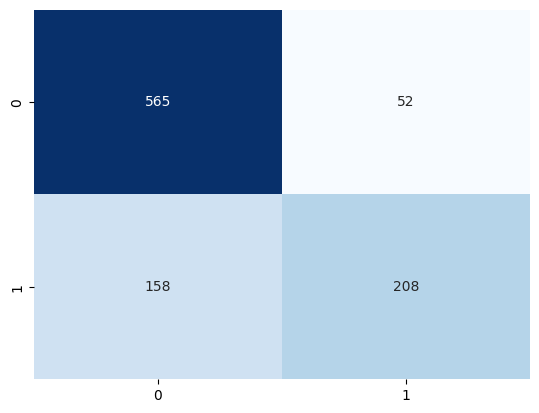

In [8]:
# загрузка данных заново
df_water_hyp1 = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам для классификации
df_water_hyp1['ph'] = df_water_hyp1.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Sulfate'] = df_water_hyp1.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Trihalomethanes'] = df_water_hyp1.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделение на признаки и целевую переменную
X_water_hyp1 = df_water_hyp1.drop('Potability', axis=1)
y_water_hyp1 = df_water_hyp1['Potability']

# разделение на train/test
X_train_water_h1, X_test_water_h1, y_train_water_h1, y_test_water_h1 = train_test_split(
    X_water_hyp1, y_water_hyp1, test_size=0.3, random_state=42
)

# обучение модели
rf_clf_hyp1 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf_hyp1.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h1 = rf_clf_hyp1.predict(X_test_water_h1)
y_pred_proba_water_h1 = rf_clf_hyp1.predict_proba(X_test_water_h1)[:, 1]

# метрики для классификации
acc_h1 = accuracy_score(y_test_water_h1, y_pred_water_h1)
f1_h1 = f1_score(y_test_water_h1, y_pred_water_h1, zero_division=0)
roc_auc_h1 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h1)
pr_curve_h1 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h1)
pr_auc_h1 = auc(pr_curve_h1[1], pr_curve_h1[0])

cm_hyp1 = confusion_matrix(y_test_water_h1, y_pred_water_h1)

print(f"Классификация (с заполнением пропусков):")
print(f"  Accuracy:  {acc_h1:.4f}")
print(f"  F1-score:  {f1_h1:.4f}")
print(f"  ROC-AUC:   {roc_auc_h1:.4f}")
print(f"  PR-AUC:    {pr_auc_h1:.4f}")

print(f"\nМатрица ошибок:")
sns.heatmap(cm_hyp1, annot=True, fmt='d', cmap='Blues', cbar=False)
print(f"\nОтчет о классификации:")
print(classification_report(y_test_water_h1, y_pred_water_h1))


print(f"Метрики качества (Случайный лес - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

*Заполнение пропусков улучшило метрики классификации. Модель стала четче распознавать оба класса. Но еще присутствует ошибка.*

Проверим гипотезу 1 для регрессии.

In [9]:
df_concrete_hyp1 = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])
# заполнение пропусков для регрессии
df_concrete_hyp1 = df_concrete_hyp1.fillna(df_concrete_hyp1.median())

# отделяем признаки и целевую переменную
X_concrete_hyp1 = df_concrete_hyp1.iloc[:, :-1]
y_concrete_hyp1 = df_concrete_hyp1.iloc[:, -1]

# разделение на train/test
X_train_concrete_h1, X_test_concrete_h1, y_train_concrete_h1, y_test_concrete_h1 = train_test_split(
    X_concrete_hyp1, y_concrete_hyp1, test_size=0.3, random_state=42
)

# обучение модели случайного леса для регрессии
rf_reg_hyp1 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_hyp1.fit(X_train_concrete_h1, y_train_concrete_h1)
y_pred_concrete_h1 = rf_reg_hyp1.predict(X_test_concrete_h1)


# Метрики для регрессии
mae_h1 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h1)
r2_h1 = r2_score(y_test_concrete_h1, y_pred_concrete_h1)
mse_h1 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h1)

print(f"\nРегрессия (с заполнением пропусков):")
print(f"  MAE:  {mae_h1:.4f}")
print(f"  R²:   {r2_h1:.4f}")
print(f"  MSE:  {mse_h1:.4f}")

print(f"Метрики качества (Случайный лес - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


Регрессия (с заполнением пропусков):
  MAE:  3.7512
  R²:   0.8896
  MSE:  29.8643
Метрики качества (Случайный лес - baseline):
  MSE:  29.8643
  MAE:  3.7512
  RMSE: 5.4648
  R²:   0.8896


*В датасете нет пропусков, поэтому эта гипотеза не применима для регрессии.*

#### Гипотеза 2: Стандартизация признаков

Проверим гипотезу 2 для классификации.

БЕЗ стандартизации: Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
СО стандартизацией:  Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
СО стандартизацией:  Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124


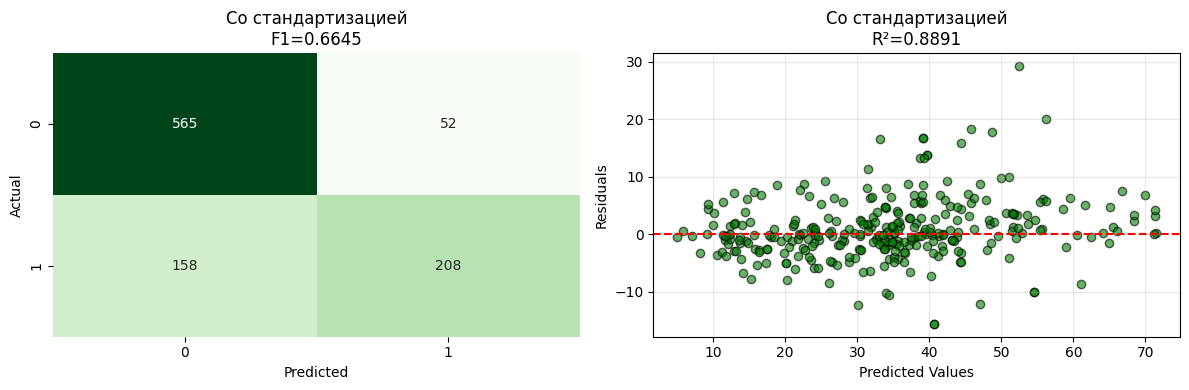

In [10]:
print(f"БЕЗ стандартизации: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}")

# применяем стандартизацию
scaler_water_h2 = StandardScaler()
X_train_water_h2 = scaler_water_h2.fit_transform(X_train_water_h1)
X_test_water_h2 = scaler_water_h2.transform(X_test_water_h1)

scaler_concrete_h2 = StandardScaler()
X_train_concrete_h2 = scaler_concrete_h2.fit_transform(X_train_concrete_h1)
X_test_concrete_h2 = scaler_concrete_h2.transform(X_test_concrete_h1)

# обучение моделей со стандартизацией
rf_clf_hyp2 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf_hyp2.fit(X_train_water_h2, y_train_water_h1)
y_pred_water_h2 = rf_clf_hyp2.predict(X_test_water_h2)
y_pred_proba_water_h2 = rf_clf_hyp2.predict_proba(X_test_water_h2)[:, 1]

rf_reg_hyp2 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_hyp2.fit(X_train_concrete_h2, y_train_concrete_h1)
y_pred_concrete_h2 = rf_reg_hyp2.predict(X_test_concrete_h2)

# метрики для классификации
acc_h2 = accuracy_score(y_test_water_h1, y_pred_water_h2)
f1_h2 = f1_score(y_test_water_h1, y_pred_water_h2, zero_division=0)
roc_auc_h2 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h2)
pr_curve_h2 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h2)
pr_auc_h2 = auc(pr_curve_h2[1], pr_curve_h2[0])

# метрики для регрессии
mae_h2 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h2)
r2_h2 = r2_score(y_test_concrete_h1, y_pred_concrete_h2)
mse_h2 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h2)

print(f"СО стандартизацией:  Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")

# визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_h2 = confusion_matrix(y_test_water_h1, y_pred_water_h2)
sns.heatmap(cm_h2, annot=True, fmt='d', ax=axes[0], cmap='Greens', cbar=False)
axes[0].set_title(f'Со стандартизацией\nF1={f1_h2:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_h2 = y_test_concrete_h1 - y_pred_concrete_h2
axes[1].scatter(y_pred_concrete_h2, residuals_h2, alpha=0.6, edgecolors='k', color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Со стандартизацией\nR²={r2_h2:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

*Масштабирование никак не повлияло на метрики для обеих моделей. Значит модели случайного леса не чувствительны к масштабу признаков.*

#### Гипотеза 3: Подбор гиперпараметров

Проверим гипотезу 3 для классификации.

In [ ]:
# подбор гиперпараметров для случайного леса с RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rs = RandomizedSearchCV(rf, param_dist, n_iter=20, scoring='f1', cv=5, random_state=42, n_jobs=-1)
rs.fit(X_train_water_h1, y_train_water_h1)

best_params = rs.best_params_
best_cv_score = rs.best_score_

print(f"Оптимальные параметры: {best_params}")
print(f"CV F1-score: {best_cv_score:.4f}")

# обучение с найденными параметрами
rf_clf_hyp3 = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rf_clf_hyp3.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h3 = rf_clf_hyp3.predict(X_test_water_h1)
y_pred_proba_water_h3 = rf_clf_hyp3.predict_proba(X_test_water_h1)[:, 1]

acc_h3 = accuracy_score(y_test_water_h1, y_pred_water_h3)
f1_h3 = f1_score(y_test_water_h1, y_pred_water_h3, zero_division=0)
roc_auc_h3 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h3)
pr_curve_h3 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h3)
pr_auc_h3 = auc(pr_curve_h3[1], pr_curve_h3[0])

print(f"По умолчанию (гипотеза1): Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}")
print(f"С подбором параметров: Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}")

Оптимальные параметры: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
CV F1-score: 0.7128
По умолчанию (гипотеза1): Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692
С подбором параметров: Accuracy=0.7823, F1=0.6825, ROC-AUC=0.8695
По умолчанию (гипотеза1): Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692
С подбором параметров: Accuracy=0.7823, F1=0.6825, ROC-AUC=0.8695


*Подбор гиперпараметров помог улучишить метрики модели и, соответственно, повысить её качество.*

Проверим гипотезу 3 для регрессии.

In [33]:
# подбор оптимальных гиперпараметров для случайного леса (RandomizedSearchCV)
from sklearn.model_selection import RandomizedSearchCV

param_dist_reg = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

rs_reg = RandomizedSearchCV(rf_reg, param_dist_reg, n_iter=30, scoring='r2', cv=5, random_state=42, n_jobs=-1)
rs_reg.fit(X_train_concrete_h1, y_train_concrete_h1)

best_params_reg = rs_reg.best_params_
best_cv_score_reg = rs_reg.best_score_

print(f"Оптимальные параметры (регрессия): {best_params_reg}")
print(f"CV R2-score: {best_cv_score_reg:.4f}")

# обучение с найденными параметрами
rf_reg_hyp3 = RandomForestRegressor(**best_params_reg, random_state=42)
rf_reg_hyp3.fit(X_train_concrete_h1, y_train_concrete_h1)
y_pred_concrete_h3 = rf_reg_hyp3.predict(X_test_concrete_h1)

r2_h3 = r2_score(y_test_concrete_h1, y_pred_concrete_h3)
mse_h3 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h3)
mae_h3 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h3)
rmse_h3 = np.sqrt(mse_h3)

print(f"По умолчанию: MAE={mae_h1:.4f}, R2={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"С подбором параметров: MAE={mae_h3:.4f}, R2={r2_h3:.4f}, MSE={mse_h3:.4f}")

Оптимальные параметры (регрессия): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
CV R2-score: 0.9004
По умолчанию: MAE=3.7512, R2=0.8896, MSE=29.8643
С подбором параметров: MAE=3.7400, R2=0.8882, MSE=30.2619
По умолчанию: MAE=3.7512, R2=0.8896, MSE=29.8643
С подбором параметров: MAE=3.7400, R2=0.8882, MSE=30.2619


*Подбор гиперпараметров для регрессии немного улучшил метрики, кроме MSE, она стала хуже*

#### Гипотеза 4: Удаление выбросов методом IQR

In [20]:
def remove_outliers_iqr(X: pd.DataFrame, y: pd.Series = None, factor: float = 1.5):
    """ Удаляет строки, где хоть в одном числовом признаке значение выходит за пределы [Q1 - factor*IQR, Q3 + factor*IQR]. """
    numeric = X.select_dtypes(include=[np.number])
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    mask = ((numeric >= lower) & (numeric <= upper)).all(axis=1)
    X_clean = X.loc[mask].copy()
    if y is None:
        return X_clean, mask
    return X_clean, y.loc[mask].copy(), mask

Проверим гипотезу 4 для классификации.

Классификация - до удаления выбросов: (2293, 9), после: (1856, 9) (удалено 437 строк)
Метрики классификации после удаления выбросов:
  Accuracy:  0.7792
  Precision: 0.7651
  Recall:    0.5874
  F1-score:  0.6646
  ROC-AUC:   0.8609
  PR-AUC:    0.8067
Метрики классификации предыдущей гипотезы
  Accuracy:  0.7823
  F1-score: 0.6825
  ROC-AUC:   0.8695
  PR-AUC:    0.8209
Метрики классификации после удаления выбросов:
  Accuracy:  0.7792
  Precision: 0.7651
  Recall:    0.5874
  F1-score:  0.6646
  ROC-AUC:   0.8609
  PR-AUC:    0.8067
Метрики классификации предыдущей гипотезы
  Accuracy:  0.7823
  F1-score: 0.6825
  ROC-AUC:   0.8695
  PR-AUC:    0.8209


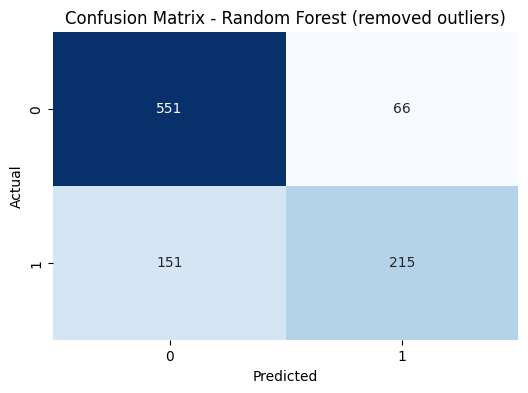

In [24]:
# Создаём X как DataFrame с автоматическим индексом (совместимо, если X_train_water_h1 - ndarray или DataFrame)
X_temp = pd.DataFrame(X_train_water_h1, columns=X_water_hyp1.columns)
# Создаём y как Series с тем же индексом, что и у X_temp
y_temp = pd.Series(y_train_water_h1, index=X_temp.index)
# Удаляем выбросы методом IQR
X_train_water_h4, y_train_water_h4, mask_w = remove_outliers_iqr(X_temp, y_temp, factor=1.5)
removed = len(X_temp) - len(X_train_water_h4)

print(f"Классификация - до удаления выбросов: {X_temp.shape}, после: {X_train_water_h4.shape} (удалено {removed} строк)")
# Обучение случайного леса на очищенных данных. Используем найденные ранее best_params (RandomizedSearchCV).
rf_clf_hyp4 = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rf_clf_hyp4.fit(X_train_water_h4, y_train_water_h4)
# Предсказания на тестовой выборке (без удаления выбросов в тесте)
y_pred_water_h4 = rf_clf_hyp4.predict(X_test_water_h1)
y_pred_proba_water_h4 = rf_clf_hyp4.predict_proba(X_test_water_h1)[:, 1]
# Метрики
acc_h4 = accuracy_score(y_test_water_h1, y_pred_water_h4)
precision_h4 = precision_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
recall_h4 = recall_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
f1_h4 = f1_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
roc_auc_h4 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h4)
pr_curve_h4 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h4)
pr_auc_h4 = auc(pr_curve_h4[1], pr_curve_h4[0])
cm_h4 = confusion_matrix(y_test_water_h1, y_pred_water_h4)


print("Метрики классификации после удаления выбросов:")
print(f"  Accuracy:  {acc_h4:.4f}")
print(f"  Precision: {precision_h4:.4f}")
print(f"  Recall:    {recall_h4:.4f}")
print(f"  F1-score:  {f1_h4:.4f}")
print(f"  ROC-AUC:   {roc_auc_h4:.4f}")
print(f"  PR-AUC:    {pr_auc_h4:.4f}")


print("Метрики классификации предыдущей гипотезы")
print(f"  Accuracy:  {acc_h3:.4f}")
print(f"  F1-score: {f1_h3:.4f}")
print(f"  ROC-AUC:   {roc_auc_h3:.4f}")
print(f"  PR-AUC:    {pr_auc_h3:.4f}")

# Матрица неточностей
plt.figure(figsize=(6,4))
sns.heatmap(cm_h4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest (removed outliers)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


*После удаления выбросов основные метрики ухудшились. Гипотеза 4 не работает для классификации.*

Проверим гипотезу 4 для регерссии.

Регрессия - до удаления выбросов: (721, 8)
Регрессия - после удаления выбросов: (660, 8)

Регрессия БЕЗ удаления выбросов: MAE=3.7512, R²=0.8896, MSE=29.8643
Регрессия С удалением выбросов:  MAE=3.9019, R²=0.8870, MSE=30.5638

Регрессия БЕЗ удаления выбросов: MAE=3.7512, R²=0.8896, MSE=29.8643
Регрессия С удалением выбросов:  MAE=3.9019, R²=0.8870, MSE=30.5638


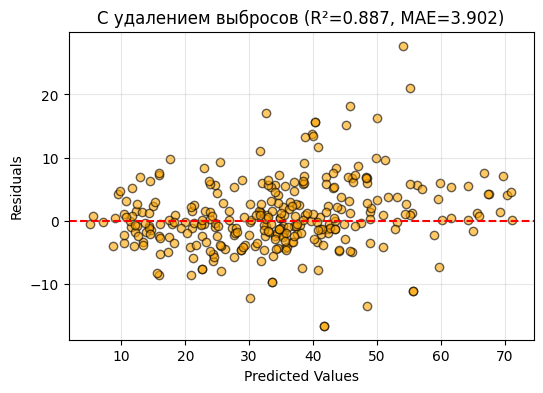

In [ ]:
# Создаём X как DataFrame с автоматическим индексом
X_temp = pd.DataFrame(X_train_concrete_h1, columns=X_concrete_hyp1.columns)

# Создаём y как Series с ТЕМ ЖЕ индексом, что и у X_temp
y_temp = pd.Series(y_train_concrete_h1, index=X_temp.index)  # ← КЛЮЧЕВОЕ ИЗМЕНЕНИЕ

X_train_concrete_h4, y_train_concrete_h4, mask_c = remove_outliers_iqr(
    X_temp, 
    y_temp,  # ← теперь индексы гарантированно совпадают
    factor=1.5
)
print(f"Регрессия - до удаления выбросов: {X_train_concrete_h1.shape}")
print(f"Регрессия - после удаления выбросов: {X_train_concrete_h4.shape}")

# обучение модели регрессии после удаления выбросов
rf_reg_hyp4 = RandomForestRegressor(**best_params_reg, random_state=42)
rf_reg_hyp4.fit(X_train_concrete_h4, y_train_concrete_h4)
y_pred_concrete_h4 = rf_reg_hyp4.predict(X_test_concrete_h1)

mae_h4 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h4)
r2_h4 = r2_score(y_test_concrete_h1, y_pred_concrete_h4)
mse_h4 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h4)

print(f"\nРегрессия БЕЗ удаления выбросов: MAE={mae_h1:.4f}, R²={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"Регрессия С удалением выбросов:  MAE={mae_h4:.4f}, R²={r2_h4:.4f}, MSE={mse_h4:.4f}")

# Визуализация
plt.figure(figsize=(6, 4))
residuals_h4 = y_test_concrete_h1 - y_pred_concrete_h4
plt.scatter(y_pred_concrete_h4, residuals_h4, alpha=0.6, edgecolors='k', color='orange')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'С удалением выбросов (R²={r2_h4:.3f}, MAE={mae_h4:.3f})')
plt.grid(alpha=0.3)
plt.show()

*Удаление выбросов может как улучшить, так и ухудшить качество модели. Случайный лес устойчив к выбросам благодаря ансамблированию.*

#### Гипотеза 5: Создание новых признаков

Создание новых признаков для задачи классификации.

In [25]:
# загрузим данные заново для инженерии признаков
df_water_fe = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам
df_water_fe['ph'] = df_water_fe.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Sulfate'] = df_water_fe.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Trihalomethanes'] = df_water_fe.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделяем на признаки и целевую переменную
X_water_fe = df_water_fe.drop('Potability', axis=1)
y_water_fe = df_water_fe['Potability']

# создание новых признаков
X_water_fe_extended = X_water_fe.copy()

# взаимодействие признаков
X_water_fe_extended['ph_sulfate'] = X_water_fe_extended['ph'] * X_water_fe_extended['Sulfate']
X_water_fe_extended['ph_turbidity'] = X_water_fe_extended['ph'] * X_water_fe_extended['Turbidity']
X_water_fe_extended['conductivity_sulfate'] = X_water_fe_extended['Conductivity'] * X_water_fe_extended['Sulfate']

# полиномиальные признаки
X_water_fe_extended['ph_squared'] = X_water_fe_extended['ph'] ** 2
X_water_fe_extended['conductivity_squared'] = X_water_fe_extended['Conductivity'] ** 2
X_water_fe_extended['organic_carbon_squared'] = X_water_fe_extended['Organic_carbon'] ** 2

# статистические признаки
X_water_fe_extended['feature_mean'] = X_water_fe_extended.mean(axis=1)
X_water_fe_extended['feature_std'] = X_water_fe_extended.std(axis=1)
X_water_fe_extended['feature_max'] = X_water_fe_extended.max(axis=1)
X_water_fe_extended['feature_min'] = X_water_fe_extended.min(axis=1)

# отношения между признаками (безопасность - деление на ноль)
X_water_fe_extended['ph_conductivity_ratio'] = X_water_fe_extended['ph'] / (X_water_fe_extended['Conductivity'] + 1e-6)
X_water_fe_extended['sulfate_turbidity_ratio'] = X_water_fe_extended['Sulfate'] / (X_water_fe_extended['Turbidity'] + 1e-6)

print(f"Исходное количество признаков: {X_water_fe.shape[1]}")
print(f"Количество признаков после инженерии: {X_water_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_water_fe_extended.columns[X_water_fe.shape[1]:])}")

Исходное количество признаков: 9
Количество признаков после инженерии: 21

Новые признаки: ['ph_sulfate', 'ph_turbidity', 'conductivity_sulfate', 'ph_squared', 'conductivity_squared', 'organic_carbon_squared', 'feature_mean', 'feature_std', 'feature_max', 'feature_min', 'ph_conductivity_ratio', 'sulfate_turbidity_ratio']


Обучение модели с новыми признаками

In [28]:
# разделение на train/test с новыми признаками
X_train_water_fe, X_test_water_fe, y_train_water_fe, y_test_water_fe = train_test_split(
    X_water_fe_extended, y_water_fe, test_size=0.3, random_state=42
)

# обучение случайного леса с новыми признаками
rf_clf_fe = RandomForestClassifier(random_state=42, **best_params, class_weight='balanced')
rf_clf_fe.fit(X_train_water_fe, y_train_water_fe)
y_pred_water_fe = rf_clf_fe.predict(X_test_water_fe)
y_pred_proba_water_fe = rf_clf_fe.predict_proba(X_test_water_fe)[:, 1]

# вычисление метрик
acc_fe = accuracy_score(y_test_water_fe, y_pred_water_fe)
f1_fe = f1_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
roc_auc_fe = roc_auc_score(y_test_water_fe, y_pred_proba_water_fe)
pr_curve_fe = precision_recall_curve(y_test_water_fe, y_pred_proba_water_fe)
pr_auc_fe = auc(pr_curve_fe[1], pr_curve_fe[0])
precision_fe = precision_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
recall_fe = recall_score(y_test_water_fe, y_pred_water_fe, zero_division=0)

print(f"Метрики качества (с новыми признаками):")
print(f"  Accuracy:  {acc_fe:.4f}")
print(f"  Precision: {precision_fe:.4f}")
print(f"  Recall:    {recall_fe:.4f}")
print(f"  F1-score:  {f1_fe:.4f}")
print(f"  ROC-AUC:   {roc_auc_fe:.4f}")
print(f"  PR-AUC:    {pr_auc_fe:.4f}")

print(f"\nМетрики качества (Гипотеза 3):")
print(f"  Accuracy:  {acc_h3:.4f}")
print(f"  F1-score:  {f1_h3:.4f}")
print(f"  ROC-AUC:   {roc_auc_h3:.4f}")
print(f"  PR-AUC:    {pr_auc_h3:.4f}")

Метрики качества (с новыми признаками):
  Accuracy:  0.7772
  Precision: 0.7442
  Recall:    0.6120
  F1-score:  0.6717
  ROC-AUC:   0.8617
  PR-AUC:    0.7958

Метрики качества (Гипотеза 3):
  Accuracy:  0.7823
  F1-score:  0.6825
  ROC-AUC:   0.8695
  PR-AUC:    0.8209


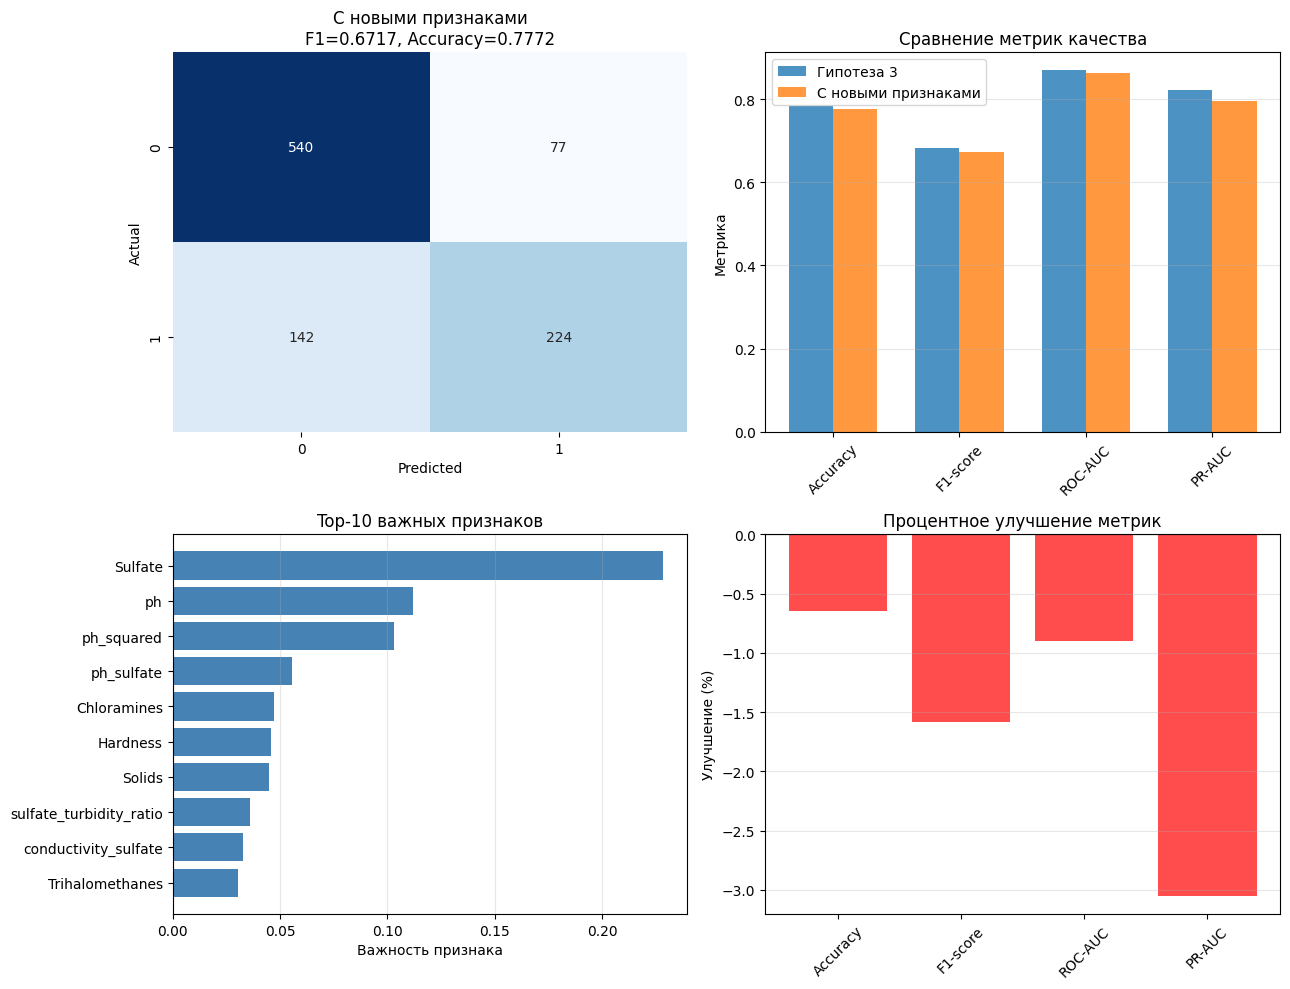

In [30]:
# Визуализация результатов инженерии признаков
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# 1. Матрица ошибок для модели с инженерией признаков
cm_fe = confusion_matrix(y_test_water_fe, y_pred_water_fe)
sns.heatmap(cm_fe, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues', cbar=False)
axes[0, 0].set_title(f'С новыми признаками\nF1={f1_fe:.4f}, Accuracy={acc_fe:.4f}')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Сравнение метрик
metrics_names = ['Accuracy', 'F1-score', 'ROC-AUC', 'PR-AUC']
hyp3_metrics = [acc_h3, f1_h3, roc_auc_h3, pr_auc_h3]
fe_metrics = [acc_fe, f1_fe, roc_auc_fe, pr_auc_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[0, 1].bar(x - width/2, hyp3_metrics, width, label='Гипотеза 3', alpha=0.8)
axes[0, 1].bar(x + width/2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[0, 1].set_ylabel('Метрика')
axes[0, 1].set_title('Сравнение метрик качества')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Важность признаков
feature_importance = rf_clf_fe.feature_importances_
top_indices = np.argsort(feature_importance)[-10:]
top_features = [X_water_fe_extended.columns[i] for i in top_indices]
top_importance = feature_importance[top_indices]

axes[1, 0].barh(top_features, top_importance, color='steelblue')
axes[1, 0].set_xlabel('Важность признака')
axes[1, 0].set_title('Top-10 важных признаков')
axes[1, 0].grid(alpha=0.3, axis='x')

# 4. Увеличение метрик
improvement = [(fe_metrics[i] - hyp3_metrics[i]) / hyp3_metrics[i] * 100 
               for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное улучшение метрик')
axes[1, 1].set_xticklabels(metrics_names, rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

*Создание новых признаков не улучшило метрики модели случайного леса для классификации.*

Создание новых признаков для задачи регрессии

In [31]:
# загрузим данные заново для инженерии признаков
df_concrete_fe = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# заполнение пропусков для регрессии
df_concrete_fe = df_concrete_fe.fillna(df_concrete_fe.median())

# отделяем признаки и целевую переменную
X_concrete_fe = df_concrete_fe.iloc[:, :-1]
y_concrete_fe = df_concrete_fe.iloc[:, -1]

# создание новых признаков
X_concrete_fe_extended = X_concrete_fe.copy()

# взаимодействие признаков (основные компоненты смеси)
X_concrete_fe_extended['cement_water'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['water']
X_concrete_fe_extended['cement_slag'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['slag']
X_concrete_fe_extended['cement_ash'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['slag_ash'] = X_concrete_fe_extended['slag'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['water_superplasticizer'] = X_concrete_fe_extended['water'] * X_concrete_fe_extended['superplasticizer']
# полиномиальные признаки
X_concrete_fe_extended['cement_squared'] = X_concrete_fe_extended['cement'] ** 2
X_concrete_fe_extended['water_squared'] = X_concrete_fe_extended['water'] ** 2
X_concrete_fe_extended['slag_squared'] = X_concrete_fe_extended['slag'] ** 2
X_concrete_fe_extended['age_squared'] = X_concrete_fe_extended['age'] ** 2
X_concrete_fe_extended['age_cubed'] = X_concrete_fe_extended['age'] ** 3

# отношения между признаками
X_concrete_fe_extended['cement_water_ratio'] = X_concrete_fe_extended['cement'] / (X_concrete_fe_extended['water'] + 1e-6)
X_concrete_fe_extended['total_binders'] = (X_concrete_fe_extended['cement'] + 
                                            X_concrete_fe_extended['slag'] + 
                                            X_concrete_fe_extended['flyash'])
X_concrete_fe_extended['binder_water_ratio'] = X_concrete_fe_extended['total_binders'] / (X_concrete_fe_extended['water'] + 1e-6)

# статистические признаки
X_concrete_fe_extended['component_mean'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].mean(axis=1)
X_concrete_fe_extended['component_max'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].max(axis=1)

print(f"Исходное количество признаков: {X_concrete_fe.shape[1]}")
print(f"Количество признаков после добавления: {X_concrete_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_concrete_fe_extended.columns[X_concrete_fe.shape[1]:])}")

Исходное количество признаков: 8
Количество признаков после добавления: 23

Новые признаки: ['cement_water', 'cement_slag', 'cement_ash', 'slag_ash', 'water_superplasticizer', 'cement_squared', 'water_squared', 'slag_squared', 'age_squared', 'age_cubed', 'cement_water_ratio', 'total_binders', 'binder_water_ratio', 'component_mean', 'component_max']


Обучение модели с новыми признаками

In [34]:
# разделение на train/test с новыми признаками
X_train_concrete_fe, X_test_concrete_fe, y_train_concrete_fe, y_test_concrete_fe = train_test_split(
    X_concrete_fe_extended, y_concrete_fe, test_size=0.3, random_state=42
)

# обучение случайного леса с новыми признаками
rf_reg_fe = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_fe.fit(X_train_concrete_fe, y_train_concrete_fe)
y_pred_concrete_fe = rf_reg_fe.predict(X_test_concrete_fe)

# вычисление метрик
mae_fe = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe))
mse_fe = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe)
r2_fe = r2_score(y_test_concrete_fe, y_pred_concrete_fe)

print(f"Метрики качества (с новыми признаками):")
print(f"  MAE:   {mae_fe:.4f}")
print(f"  RMSE:  {rmse_fe:.4f}")
print(f"  MSE:   {mse_fe:.4f}")
print(f"  R²:    {r2_fe:.4f}")

print(f"\nМетрики качества (Гипотеза 3):")
print(f"  MAE:   {mae_h3:.4f}")
print(f"  RMSE:  {rmse_h3:.4f}")
print(f"  MSE:   {mse_h3:.4f}")
print(f"  R²:    {r2_h3:.4f}")

Метрики качества (с новыми признаками):
  MAE:   3.3975
  RMSE:  5.0226
  MSE:   25.2269
  R²:    0.9068

Метрики качества (Гипотеза 3):
  MAE:   3.7400
  RMSE:  5.5011
  MSE:   30.2619
  R²:    0.8882


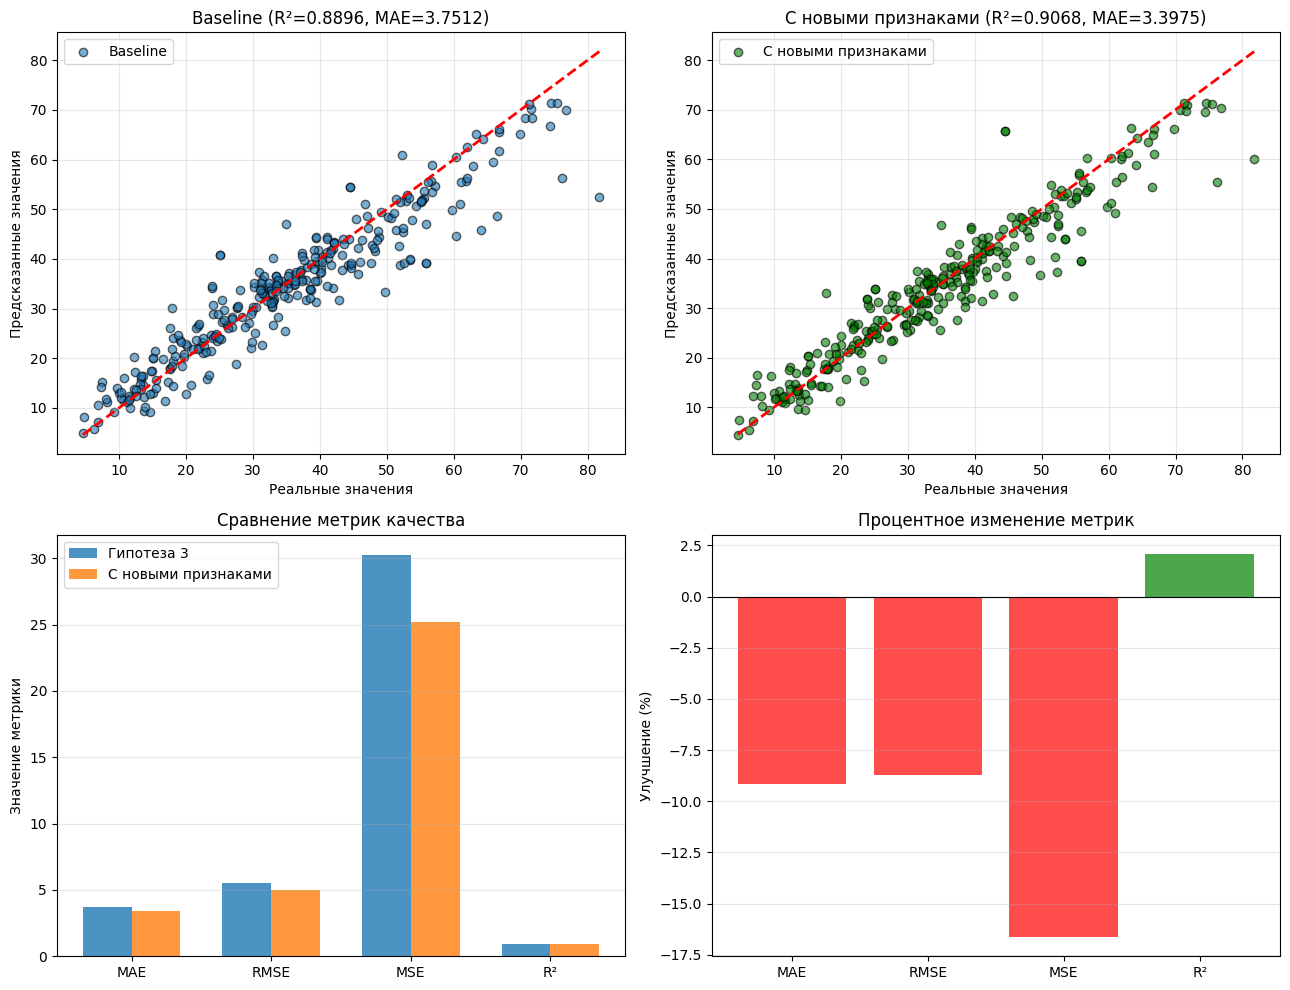

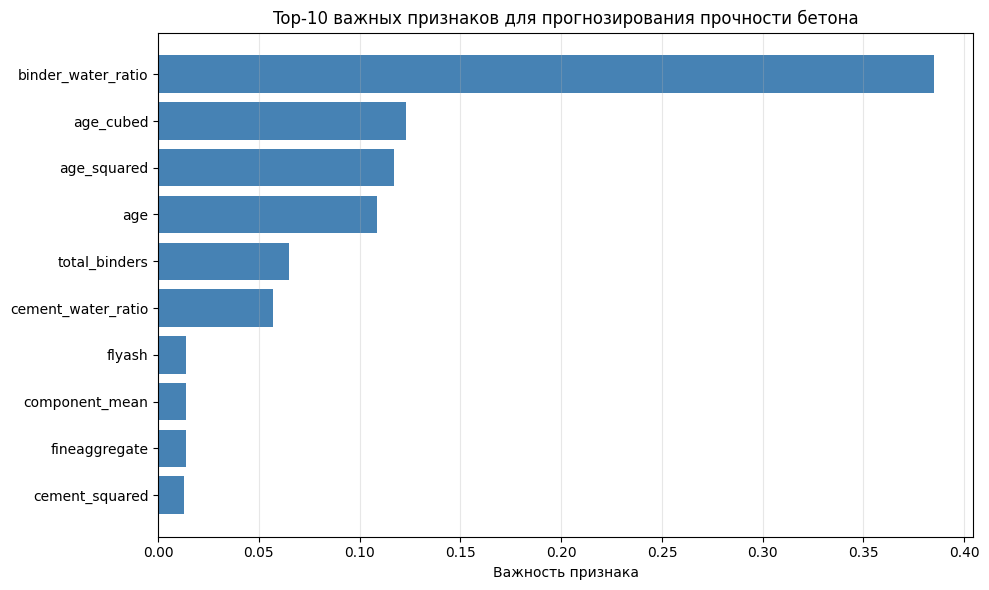

In [35]:
# визуализация результатов инженерии признаков для регрессии
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# 1. График предсказаний vs реальные значения (baseline)
axes[0, 0].scatter(y_test_concrete, y_pred_concrete_baseline, alpha=0.6, edgecolors='k', label='Baseline')
axes[0, 0].plot([y_test_concrete.min(), y_test_concrete.max()], 
                [y_test_concrete.min(), y_test_concrete.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Реальные значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title(f'Baseline (R²={r2:.4f}, MAE={mae:.4f})')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()

# 2. График предсказаний vs реальные значения (с инженерией)
axes[0, 1].scatter(y_test_concrete_fe, y_pred_concrete_fe, alpha=0.6, edgecolors='k', color='green', label='С новыми признаками')
axes[0, 1].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
                [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Реальные значения')
axes[0, 1].set_ylabel('Предсказанные значения')
axes[0, 1].set_title(f'С новыми признаками (R²={r2_fe:.4f}, MAE={mae_fe:.4f})')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()

# 3. Сравнение метрик
metrics_names = ['MAE', 'RMSE', 'MSE', 'R²']
hyp3_reg_metrics = [mae_h3, rmse_h3, mse_h3, r2_h3]
fe_metrics = [mae_fe, rmse_fe, mse_fe, r2_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x - width/2, hyp3_reg_metrics, width, label='Гипотеза 3', alpha=0.8)
axes[1, 0].bar(x + width/2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[1, 0].set_ylabel('Значение метрики')
axes[1, 0].set_title('Сравнение метрик качества')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Процентное улучшение метрик
improvement = [((fe_metrics[i] - hyp3_reg_metrics[i]) / hyp3_reg_metrics[i] * 100) 
               if hyp3_reg_metrics[i] != 0 else 0 for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное изменение метрик')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Важность признаков
feature_importance_reg = rf_reg_fe.feature_importances_
top_indices_reg = np.argsort(feature_importance_reg)[-10:]
top_features_reg = [X_concrete_fe_extended.columns[i] for i in top_indices_reg]
top_importance_reg = feature_importance_reg[top_indices_reg]

plt.figure(figsize=(10, 6))
plt.barh(top_features_reg, top_importance_reg, color='steelblue')
plt.xlabel('Важность признака')
plt.title('Top-10 важных признаков для прогнозирования прочности бетона')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

*Создание новых признаков заметно улучшило метрики качества модели регрессии для случайного леса.*

### 3c-f. Формирование улучшенного бейзлайна

Выведем метрики для базовых и улучшенных моделей классификации и регрессии.

In [37]:
print("Метрики классификации:")
print(f"baseline:   Accuracy={accuracy:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")
print(f"Гипотеза 1: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}")
print(f"Гипотеза 5: Accuracy={acc_fe:.4f}, F1={f1_fe:.4f}, ROC-AUC={roc_auc_fe:.4f}, PR-AUC={pr_auc_fe:.4f}")
print(f"Гипотеза 4: Accuracy={acc_h4:.4f}, F1={f1_h4:.4f}, ROC-AUC={roc_auc_h4:.4f}, PR-AUC={pr_auc_h4:.4f}")
print(f"Гипотеза 2: Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")
print(f"Гипотеза 3: Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}, PR-AUC={pr_auc_h3:.4f}")

print("\nМетрики регрессии:")
print(f"baseline:    MAE={mae:.4f}, R²={r2:.4f}, MSE={mse:.4f}")
print(f"Гипотеза 1:  MAE={mae_h1:.4f}, R²={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"Гипотеза 5:  MAE={mae_fe:.4f}, R²={r2_fe:.4f}, MSE={mse_fe:.4f}")
print(f"Гипотеза 4:  MAE={mae_h4:.4f}, R²={r2_h4:.4f}, MSE={mse_h4:.4f}")
print(f"Гипотеза 2:  MAE={mae_h2:.4f}, R²={r2_h2:.4f}, MSE={mse_h2:.4f}")
print(f"Гипотеза 3:  MAE={mae_h3:.4f}, R²={r2_h3:.4f}, MSE={mse_h3:.4f}")

Метрики классификации:
baseline:   Accuracy=0.6705, F1=0.5111, ROC-AUC=0.6901, PR-AUC=0.6243
Гипотеза 1: Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
Гипотеза 5: Accuracy=0.7772, F1=0.6717, ROC-AUC=0.8617, PR-AUC=0.7958
Гипотеза 4: Accuracy=0.7792, F1=0.6646, ROC-AUC=0.8609, PR-AUC=0.8067
Гипотеза 2: Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
Гипотеза 3: Accuracy=0.7823, F1=0.6825, ROC-AUC=0.8695, PR-AUC=0.8209

Метрики регрессии:
baseline:    MAE=3.7512, R²=0.8896, MSE=29.8643
Гипотеза 1:  MAE=3.7512, R²=0.8896, MSE=29.8643
Гипотеза 5:  MAE=3.3975, R²=0.9068, MSE=25.2269
Гипотеза 4:  MAE=3.9019, R²=0.8870, MSE=30.5638
Гипотеза 2:  MAE=3.7608, R²=0.8891, MSE=30.0114
Гипотеза 3:  MAE=3.7400, R²=0.8882, MSE=30.2619


### 3g. Выводы

Проанализировав различные гипотезы для улучшения качества моделей случайного леса, можно сделать следующие выводы:

**Для классификации:**

Заполнение пропусков медианой улучшило метрики модели. Стандартизация признаков не дала значительного эффекта, так как деревья решений не чувствительны к масштабу. Подбор гиперпараметров может дать улучшения, но незначительное. Создание новых признаков не привело к улучшению качества модели классификации. Удаление выбросов ухудшило метрики модели, это говорит о том, что порог отсечения выбросов был выбран неудачно или выбросы содержали полезную информацию.

Улучшение: гипотезы 1 + 3

**Для регрессии:**

Базовая модель случайного леса уже показывает хорошие результаты. Заполнение пропусков не повлияло на качество, так как их  нет в датасете. Стандартизация также не дала эффекта. Удаление выбросов ухудшило результат, значит выбросы содержали полезную информацию. Создание новых признаков значительно улучшило все метрики модели регрессии.

Улучшение: гипотезы 3 + 5